In [2]:
import os
os.chdir(r'C:\Users\Akshay\csvandtext')

In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import s3fs
#import boto3
#s3fs.__version__


In [82]:
#dataset = pd.read_csv('sonar.csv',header=None)
#dataset = pd.read_excel('pairplot.xls', header=0)
## S3 Data
dataset = pd.read_excel('s3://mlanalysisdata/Table_1.4a_Primary_Energy_Imports_by_Source.xlsx', header=10)[1:]


In [83]:
## Load Data
dataset

,Month,Coal Imports,Coal Coke Imports,Natural Gas Imports,Crude Oil Imports,"Petroleum Products, Excluding Biofuels, Imports","Total Petroleum, Excluding Biofuels, Imports",Biomass Imports,Electricity Imports,Total Primary Energy Imports
1,1973-01-01,5e-05,0.000769,0.095105,0.492659,0.579615,1.07227,Not Available,0.004882,1.17308
2,1973-02-01,5e-05,0.000719,0.086051,0.467879,0.608896,1.07678,Not Available,0.00441,1.168
3,1973-03-01,7.5e-05,0.000818,0.093962,0.570188,0.639547,1.20974,Not Available,0.004882,1.30947
4,1973-04-01,0.0001,0.000868,0.090705,0.532017,0.456754,0.988771,Not Available,0.004725,1.08517
5,1973-05-01,0.00025,0.002802,0.088076,0.579687,0.487106,1.06679,Not Available,0.004882,1.1628
6,1973-06-01,7.5e-05,0.00243,0.081178,0.561998,0.479208,1.04121,Not Available,0.004725,1.12961
7,1973-07-01,5e-05,0.00181,0.081493,0.631319,0.496691,1.12801,Not Available,0.004882,1.21625
8,1973-08-01,0.0002,0.002182,0.086594,0.647828,0.556162,1.20399,Not Available,0.004882,1.29785
9,1973-09-01,0.0006,0.004042,0.083267,0.605649,0.527862,1.13351,Not Available,0.004725,1.22615
10,1973-10-01,0.000975,0.004439,0.094547,0.674219,0.536711,1.21093,Not Available,0.004882,1.31577


In [84]:
### Check structure
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 1 to 532
Data columns (total 10 columns):
Month                                              532 non-null datetime64[ns]
Coal Imports                                       532 non-null object
Coal Coke Imports                                  532 non-null object
Natural Gas Imports                                532 non-null object
Crude Oil Imports                                  532 non-null object
Petroleum Products, Excluding Biofuels, Imports    532 non-null object
Total Petroleum, Excluding Biofuels, Imports       532 non-null object
Biomass Imports                                    532 non-null object
Electricity Imports                                532 non-null object
Total Primary Energy Imports                       532 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 41.6+ KB


In [85]:
### Descriptive Statistics
dataset.describe()

,Month,Coal Imports,Coal Coke Imports,Natural Gas Imports,Crude Oil Imports,"Petroleum Products, Excluding Biofuels, Imports","Total Petroleum, Excluding Biofuels, Imports",Biomass Imports,Electricity Imports,Total Primary Energy Imports
count,532,532.00000,532.000000,532.000000,532.000000,532.000000,532.000000,532,532.000000,532.000000
unique,532,518.00000,493.000000,532.000000,532.000000,532.000000,532.000000,223,439.000000,532.000000
top,2009-09-01 00:00:00,0.00005,0.000015,0.065553,1.225217,0.288098,1.228222,Not Available,0.007231,1.156477
freq,1,3.00000,4.000000,1.000000,1.000000,1.000000,1.000000,240,7.000000,1.000000
first,1973-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing Values Detection

In [86]:
dataset.isnull().any()

Month                                              False
Coal Imports                                       False
Coal Coke Imports                                  False
Natural Gas Imports                                False
Crude Oil Imports                                  False
Petroleum Products, Excluding Biofuels, Imports    False
Total Petroleum, Excluding Biofuels, Imports       False
Biomass Imports                                    False
Electricity Imports                                False
Total Primary Energy Imports                       False
dtype: bool

In [87]:
dataset.isnull().sum()

Month                                              0
Coal Imports                                       0
Coal Coke Imports                                  0
Natural Gas Imports                                0
Crude Oil Imports                                  0
Petroleum Products, Excluding Biofuels, Imports    0
Total Petroleum, Excluding Biofuels, Imports       0
Biomass Imports                                    0
Electricity Imports                                0
Total Primary Energy Imports                       0
dtype: int64

# Outlier Detection

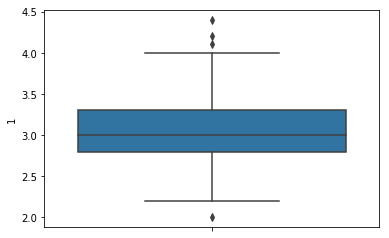

In [54]:
#sns.boxplot(y=1,data=dataset)

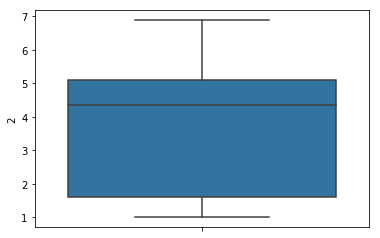

In [55]:
#sns.boxplot(y=2,data=dataset)

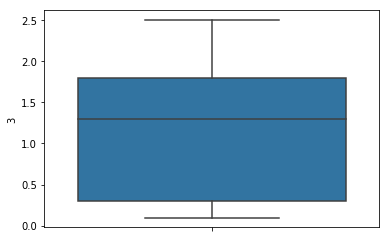

In [56]:
#sns.boxplot(y=3,data=dataset)

# Pairplot for checking on dependent features relationships

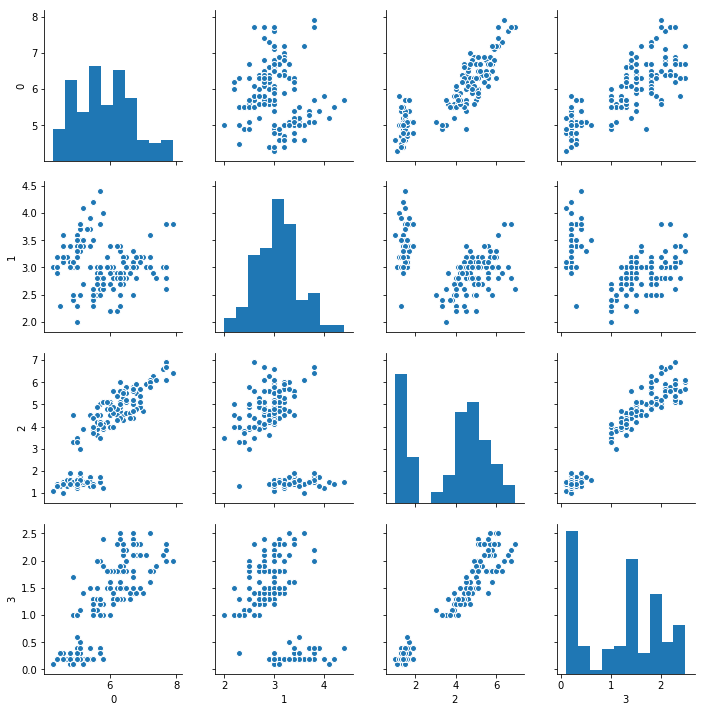

In [57]:
sns.pairplot(dataset)

# Correlation Analysis

In [48]:
dataset.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


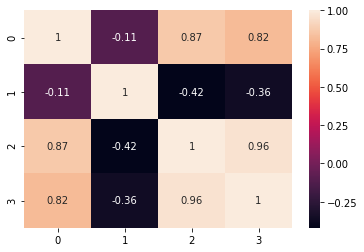

In [58]:
sns.heatmap(dataset.corr(),annot=True)

# Create Features Array

In [90]:
x=dataset.iloc[:,0].values.reshape(-1,1)

# Create Target Label Array


In [164]:
y=dataset.iloc[:,3].values

# Feature Processing ( Standardization or Normalization)


In [116]:
## Standardization for Feature Scaling if needed
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x=sc_x.fit_transform(x)


In [165]:
x

array([[261.96 ],
       [731.94 ],
       [ 14.62 ],
       ...,
       [258.576],
       [ 29.6  ],
       [243.16 ]])

In [166]:
y

array([ 41.9136, 219.582 ,   6.8714, ...,  19.3932,  13.32  ,  72.948 ])

# Label Encoding and One Hot Encoding of Categorical Features

In [10]:
## Label Encoding for categorical values if needed

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,3] = labelencoder.fit_transform(x[:,3])

In [11]:
## One Hot Encoding if after Label Encoding we have multiple Label Codes

onehotencoder = OneHotEncoder(categorical_features=[3])
x = onehotencoder.fit_transform(x).toarray()

# Testing and training data split


In [93]:
## Train Test split of data using import train_test_split within sklearn.model_selection 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

NameError: name 'y' is not defined

# Load Metrics to check Accuracy

In [183]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
r2_score(y_test, y_pred)

0.18026787583049952

# ML with Linear Regression

In [177]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
regressor.coef_

array([0.18905501])

In [179]:
regressor.intercept_

-13.965998666031613

In [180]:
y_pred=regressor.predict(x_test)

In [181]:
y_test

array([132.5898, 112.574 ,  32.098 , ..., -54.5496, -47.0583,  93.0552])

In [182]:
y_pred

array([59.75978373, 34.40372574, 34.58030312, ..., -9.92173388,
       55.22983663, 46.69797306])

In [185]:
sqrt(mean_squared_error(y_test, y_pred))

183.52918862747495

In [24]:
x=dataset.iloc[:,[0,2]].values

In [72]:
x

array([[ 0.0515104 , -0.8043034 , -0.75664349],
       [ 0.80563348, -0.35486486, -0.75664349],
       [-0.34536777, -0.8043034 , -0.75664349],
       ...,
       [ 0.04608048, -0.8043034 ,  0.21215332],
       [-0.32133108,  0.09457367, -0.75664349],
       [ 0.02134419, -0.8043034 , -0.75664349]])

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [131]:
regressor_new = LinearRegression()
regressor_new.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
regressor_new.coef_

array([104.59215794,  -5.35943132, -51.21261877])

In [133]:
regressor_new.intercept_

27.231571294572877

In [134]:
y_pred=regressor_new.predict(x_test)

In [78]:
y_test

array([  0.712 ,   9.3612,  68.3332, ...,  39.5   , 315.825 ,   3.6288])

In [79]:
y_pred

array([-24.04909454, -23.92435928,  69.18468526, ...,  91.55666445,
       231.98412145, -14.6205593 ])

In [138]:
r2_score(y_test, y_pred)


0.3668756121766722

## Evaluate RMSE for accuracy

In [139]:
sqrt(mean_squared_error(y_test, y_pred))

159.84916159198605

In [81]:
dataset

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
5,48.8600,7,0.00,14.1694
6,7.2800,4,0.00,1.9656
7,907.1520,6,0.20,90.7152
8,18.5040,3,0.20,5.7825
9,114.9000,5,0.00,34.4700


# ML using Stats Model package

In [82]:
import statsmodels.api as sm

C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [83]:
regressor_ols = sm.OLS(endog=y_train, exog = x_train).fit()

In [84]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     709.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:07:53   Log-Likelihood:                -47721.
No. Observations:                6995   AIC:                         9.545e+04
Df Residuals:                    6992   BIC:                         9.547e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.1239      2.529     40.779      0.000      98.167     108.081
x2            -6.5807      2.697     -2.440      0.015     -11.868      -1.293
x3           -52.9712      2.651    -19.979      0.000     -58.169     -47.774
==============================================================================
Omnibus:                    10173.696   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40802323.455
Skew:                          -7.770   Prob(JB):                         0.00
Kurtosis:                     376.834   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
len(x_train)

6995

In [87]:
x_train = np.append(arr= x_train, values = np.ones((35,1)).astype(int), axis=1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [40]:
y = mx + 1*c 

NameError: name 'mx' is not defined

In [96]:
pd.DataFrame(x_train)

,0,1,2
0,0.061587,1.442889,0.212153
1,-0.031960,0.993451,-0.756643
2,0.451206,2.341766,0.212153
3,-0.300151,2.791205,-0.756643
4,-0.329675,-0.804303,-0.756643
5,-0.336671,-0.354865,-0.756643
6,1.433328,2.341766,0.212153
7,-0.343872,-0.354865,0.212153
8,-0.134718,0.544012,-0.756643
9,-0.351472,0.094574,0.212153


In [88]:
regressor_ols = sm.OLS(endog=y_train, exog = x_train).fit()

In [89]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     709.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:08:54   Log-Likelihood:                -47721.
No. Observations:                6995   AIC:                         9.545e+04
Df Residuals:                    6992   BIC:                         9.547e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           103.1239      2.529     40.779      0.000      98.167     108.081
x2            -6.5807      2.697     -2.440      0.015     -11.868      -1.293
x3           -52.9712      2.651    -19.979      0.000     -58.169     -47.774
==============================================================================
Omnibus:                    10173.696   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40802323.455
Skew:                          -7.770   Prob(JB):                         0.00
Kurtosis:                     376.834   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Create Features Array

In [44]:
x=dataset.iloc[:,1:2].values

In [ ]:
# Train test split again

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

# ML with Decision Tree Regressor

In [95]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [188]:
y_pred=regressor.predict(x_test)

In [189]:
y_test

array([-14.8832,  -9.7972,   7.986 , ...,   6.8714,   2.9372,   9.116 ])

In [190]:
y_pred

array([ 20.1015 ,  10.32216,   7.56   , ...,   6.83485,  10.32216,
       -11.6622 ])

In [97]:
from math import sqrt

In [54]:
sqrt[(y_test-y_pred)^2/n]

NameError: name 'n' is not defined

In [191]:
y_pred=pd.DataFrame(y_pred)

In [192]:
y_test=pd.DataFrame(y_test)

In [193]:
y_pred=y_pred.rename(columns={0:'pred'})

In [194]:
y_test=y_test.rename(columns={0:'test'})

In [195]:
output=pd.concat([y_pred, y_test], axis=1)

In [196]:
output['Diff'] = output.test-output.pred

In [197]:
output['diffsq']=output['Diff']*output['Diff']

In [198]:
np.sqrt(sum(output['diffsq'])/len(output))

221.83755682638713

## Evaluate RMSE for accuracy

In [199]:
sqrt(mean_squared_error(y_test, y_pred))

221.8375568263872

# ML with Random Forest Regressor

In [200]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=3)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [201]:
y_pred=regressor.predict(x_test)

In [202]:
y_pred

array([21.17660909, 10.58324444,  7.56      , ...,  6.83507152,
       10.58324444,  0.0753    ])

In [203]:
y_pred=pd.DataFrame(y_pred)
y_test=pd.DataFrame(y_test)
y_pred=y_pred.rename(columns={0:'pred'})
y_test=y_test.rename(columns={0:'test'})
output=pd.concat([y_pred, y_test], axis=1)
output['Diff'] = output.test-output.pred
output['diffsq']=output['Diff']*output['Diff']
np.sqrt(sum(output['diffsq'])/len(output))

164.53225376978813

## Evaluate RMSE for accuracy

In [204]:
sqrt(mean_squared_error(y_test, y_pred))

164.53225376978824